In [32]:
import torch

import torch.nn as nn 

import torch.nn.functional as F

import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from PIL import Image


In [33]:
# Load a grayscale dog image

# Load the local image

img = Image.open("Husky Love.jpg").convert("L")  # Convert to grayscale


In [34]:
transform = transforms.Compose([

    transforms.Resize((128,128)),

    transforms.ToTensor()
])


img_tensor = transform(img).unsqueeze(0)  # Shape: [1, 1, 128, 128]

print(f"Image tensor shape: {img_tensor.shape}")

Image tensor shape: torch.Size([1, 1, 128, 128])


In [35]:
# Conv Layer 1: 1 input channel (grayscale), 6 filters, 3x3 kernel

conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)

relu1 = nn.ReLU()

pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

In [36]:
# Forward pass through Conv1

x1 = conv1(img_tensor)

x1_relu = relu1(x1)

x1_pooled = pool1(x1_relu)


print(f"Conv1 Output Shape: {x1.shape}")

print(f"After Pooling Shape: {x1_pooled.shape}")

Conv1 Output Shape: torch.Size([1, 6, 128, 128])
After Pooling Shape: torch.Size([1, 6, 64, 64])


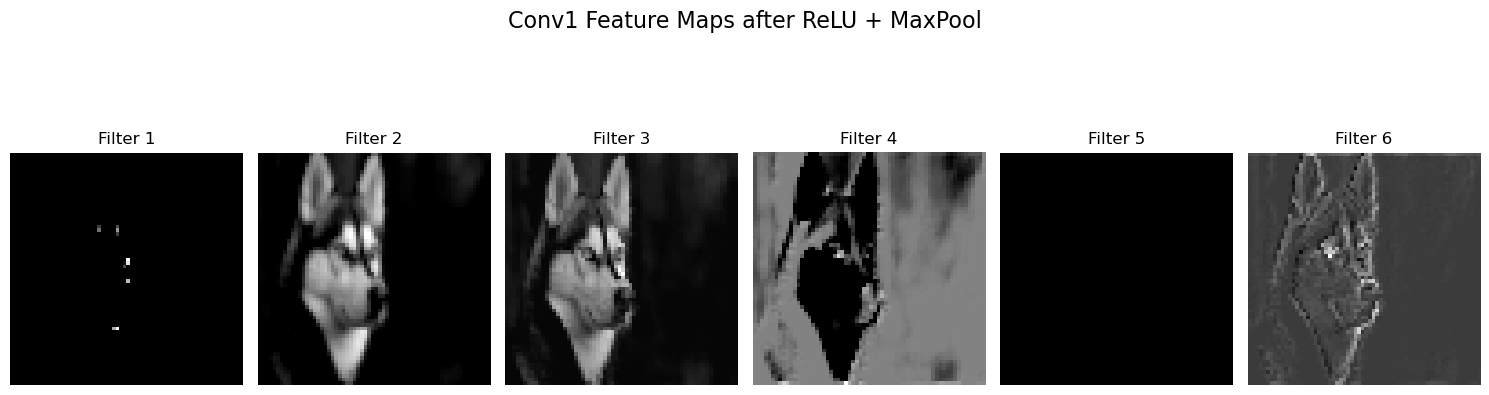

In [37]:
# Visualize the 6 feature maps

fig, axs = plt.subplots(1,6, figsize=(15,5))

for i in range(6):

    axs[i].imshow(x1_pooled[0, i].detach().numpy(), cmap='gray')

    axs[i].axis('off')

    axs[i].set_title(f'Filter {i+1}')

plt.suptitle("Conv1 Feature Maps after ReLU + MaxPool", fontsize=16)

plt.tight_layout()

plt.show()

In [38]:
# Conv Layer 2: Takes 6 channels in (from Conv1), outputs 12 channels

conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3,padding=1)

relu2 = nn.ReLU()

pool2 = nn.MaxPool2d(kernel_size=2, stride=2)


# Forward pass through Conv2

x2 = conv2(x1_pooled)

x2_relu = relu2(x2)

x2_pooled = pool2(x2_relu)


print(f'Conv2 Output Shape{x2.shape}')

print(f'After Pooling Shape : {x2_pooled.shape}')

Conv2 Output Shapetorch.Size([1, 12, 64, 64])
After Pooling Shape : torch.Size([1, 12, 32, 32])


Visualize Feature Maps After Conv2

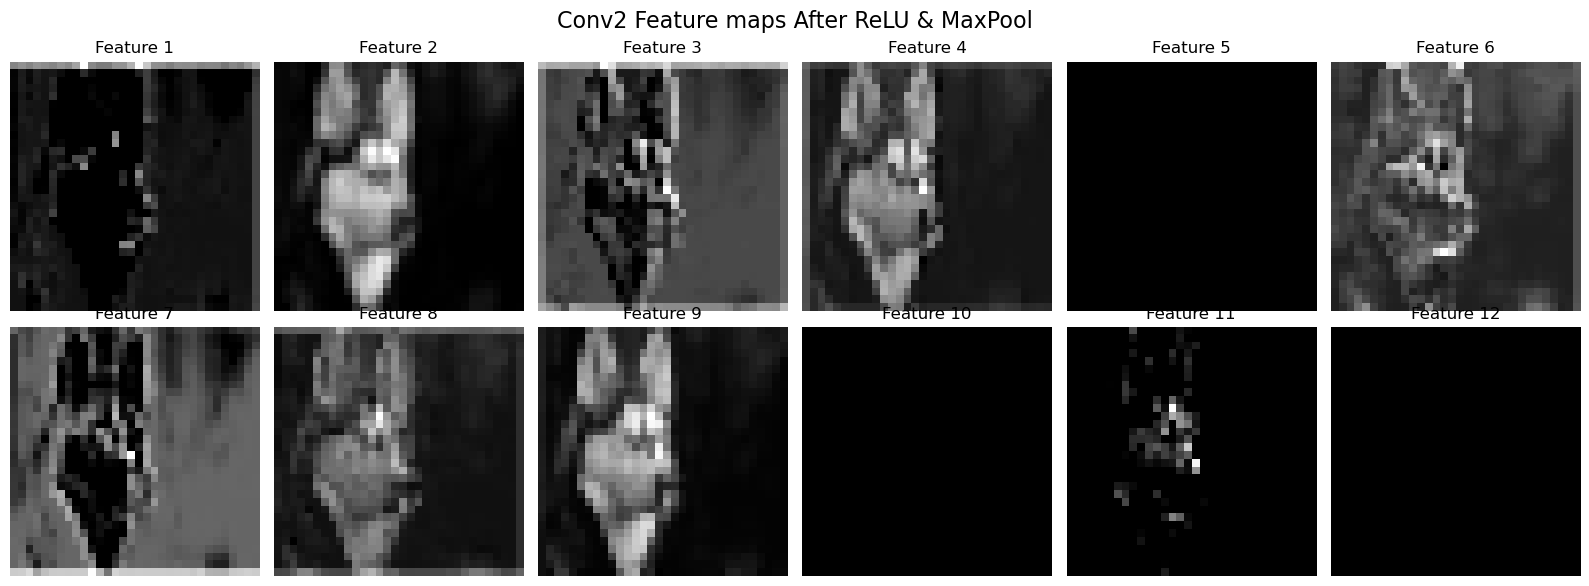

In [39]:
# Visualize first 12 feature maps

fig, axs = plt.subplots(2,6, figsize=(16,6))

for i in range(12):

    axs[i//6, i%6].imshow(x2_pooled[0,i].detach().numpy(), cmap='gray')

    axs[i//6, i%6].axis('off')

    axs[i//6, i%6].set_title(f'Feature {i+1}')

plt.suptitle('Conv2 Feature maps After ReLU & MaxPool', fontsize=16)

plt.tight_layout()

plt.show()

Input Image (Dog Face)
      ↓
[Conv Layer 1] → Detect edges, corners
      ↓
[Conv Layer 2] → Extract fur, eyes, nose (features)
      ↓
[Pooling Layers] → Reduce spatial size (retain important features)
      ↓
[Conv Layer 3+] → More abstract features (ear shape, mouth, patterns)
      ↓
[Flatten Layer] → Convert 3D → 1D
      ↓
[Fully Connected (Dense) Layer 1] → Combine all features
      ↓
[Fully Connected (Dense) Layer 2] → Higher-level reasoning
      ↓
[Output Layer] → Predict: Dog (Yes/No or class probabilities)
